In [6]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

import joblib 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [7]:
train_data=pd.read_csv("cs-training.csv")

In [8]:
train_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [9]:
train_data_double_axis0=pd.concat([train_data, train_data], axis=1)
train_data_double_axis0.shape

(150000, 24)

In [10]:
train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [11]:
train_data.shape

(150000, 12)

In [12]:
train_data.MonthlyIncome

0          9120.0
1          2600.0
2          3042.0
3          3300.0
4         63588.0
           ...   
149995     2100.0
149996     5584.0
149997        NaN
149998     5716.0
149999     8158.0
Name: MonthlyIncome, Length: 150000, dtype: float64

In [13]:
train_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [14]:
train_data[train_data.age>=100]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7763,7764,0,0.069167,101,0,50.000000,NaN,2,0,0,0,0.0
19884,19885,0,1.000000,103,0,0.000000,1600.0,3,0,0,0,0.0
25561,25562,0,0.009866,102,0,0.002424,3300.0,3,0,0,0,0.0
40007,40008,0,0.064748,107,0,939.000000,NaN,9,0,1,0,0.0
56761,56762,0,0.003469,105,0,2.000000,NaN,4,0,0,0,NaN
57967,57968,0,0.001397,103,0,1798.500000,1.0,11,0,2,0,0.0
90937,90938,0,0.000000,102,0,0.000000,NaN,12,0,0,0,0.0
93813,93814,0,0.025780,101,0,0.013797,1666.0,5,0,0,0,0.0
96450,96451,0,0.109642,102,0,0.273844,3417.0,7,0,0,0,1.0
105790,105791,0,0.109307,109,0,2141.000000,NaN,17,0,1,0,NaN


In [15]:
train_data.MonthlyIncome.isnull().sum()

29731

In [16]:
train_dropped = train_data.dropna(subset=['MonthlyIncome'])
len(train_dropped)

120269

In [17]:
target=train_dropped['SeriousDlqin2yrs']
target

0         1
1         0
2         0
3         0
4         0
         ..
149994    0
149995    0
149996    0
149998    0
149999    0
Name: SeriousDlqin2yrs, Length: 120269, dtype: int64

In [18]:
target.mean()

0.06948590243537403

In [19]:
X=train_dropped[['age', 'NumberOfDependents','MonthlyIncome']]
y=target

In [20]:
print(X.shape, y.shape)

(120269, 3) (120269,)


In [21]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=20269)

In [22]:
y_train.mean()

0.06968

In [23]:
y_train_ones=y_train[y_train==1]
y_train_ones

50874     1
62872     1
15132     1
98144     1
24460     1
         ..
94101     1
102895    1
72547     1
73725     1
10619     1
Name: SeriousDlqin2yrs, Length: 6968, dtype: int64

In [24]:
X_train_ones=X_train.loc[y_train_ones.index, X_train.columns] 
X_train_ones

,age,NumberOfDependents,MonthlyIncome
50874,38,1.0,2006.0
62872,56,1.0,4333.0
15132,41,2.0,4200.0
98144,80,0.0,2500.0
24460,21,0.0,2300.0
...,...,...,...
94101,46,0.0,9000.0
102895,59,0.0,5000.0
72547,33,0.0,4100.0
73725,44,2.0,4800.0


In [25]:
X_train_extended=pd.concat([X_train, X_train_ones], axis=0)
y_train_extended=pd.concat([y_train, y_train_ones], axis=0)

In [26]:
print(X_train_extended.shape)
print(y_train_extended.shape)

(106968, 3)
(106968,)


In [27]:
y_train_extended.mean()

0.130281953481415

In [28]:
#repeat few times untill 50%  
''' 
    upsampling - sample - рядочок даних, коли дисбаланс класів (90% - 0, 10% - 1), ми штучно
    доводимо співвідношення до 50/50, шляхом копіювання і додавання рідкіснішого класу
    downsampling - викидаємо зайві нулики, щоб отримати 50/50
'''

X_train_extended=pd.concat([X_train_extended, X_train_ones], axis=0)
y_train_extended=pd.concat([y_train_extended, y_train_ones], axis=0)

In [29]:
print(X_train_extended.shape)
print(y_train_extended.shape)
y_train_extended.mean()

(113936, 3)
(113936,)


0.18347142255301221

### k1*x1 + k2*x2 + k3*x3 + b(bias відхилення) = y - Linear Regression

## Logistic Regression
### Logistic Function = 1/(1+1/e^x) 
#### x = k1*x1 + k2*x2 + k3*x3 + b

In [30]:
#initialize and train model
model=LogisticRegression()
model.fit(X_train_extended, y_train_extended)

LogisticRegression()

In [32]:
# saving our trained model for future using
filename = 'credits_recommender.sav'
joblib.dump(model, 'credits_recommender.sav')

['credits_recommender.sav']

In [33]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9314717055602151


In [129]:
#check accuracy of the model on train dataset
#y predictions for test dataset
test_pred=model.predict(X_test)

In [130]:
cm=confusion_matrix(y_test, test_pred)
print(cm)

[[13196  5584]
 [  907   582]]


<AxesSubplot:>

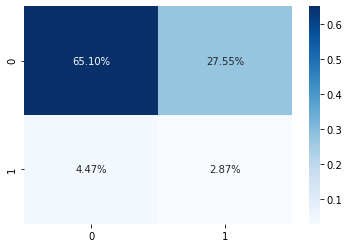

In [131]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [133]:
#support - ground truth 1, 0
print(classification_report(y_test, test_pred, target_names=['Good class', 'Non-Payment class']))

                   precision    recall  f1-score   support

       Good class       0.94      0.70      0.80     18780
Non-Payment class       0.09      0.39      0.15      1489

         accuracy                           0.68     20269
        macro avg       0.52      0.55      0.48     20269
     weighted avg       0.87      0.68      0.75     20269



In [ ]:
train_data["DebtRatio"]

In [ ]:
dir(train_data)

In [22]:
new_data=pd.DataFrame(
    {
        "#": [1, 2, 3, 4],
        "item": ['bread', 'milk', 'oranges', 'candys'],
        "price": [18.30, 22.50, 35, 148.90],
    }
)
new_data

,#,item,price
0,1,bread,18.3
1,2,milk,22.5
2,3,oranges,35.0
3,4,candys,148.9
